In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from skimage.feature import hog
import cv2, os, glob, math
import scipy.spatial
from collections import Counter 

In [3]:
def create_data(filename, px):
    data = []
    for jpg in glob.glob("images/" + filename + "/*.jpg"):
        img = np.array(mpimg.imread(jpg))
        img = cv2.resize(img, (px, px))
        fd = hog(img)
        data.append(fd)
        
    return data

def data_split(rate, array):
    l = len(array)
    n_train = math.floor((1-rate) * l)
    train = array[:n_train]
    test = array[n_train:]
    
    return train, test

def create_label(array, label1, label2):
    l = len(array)
    new_array = []
    for i in range(l):
        if i < l/2:
            new_array.append(label1)
        else:
            new_array.append(label2)
    
    return new_array

In [4]:
plt.style.use("ggplot")
datas = [500, 750, 1000, 1250, 1500]

In [5]:
data_tigers = create_data("tigers", 256)
data_dolphins = create_data("dolphins", 256)

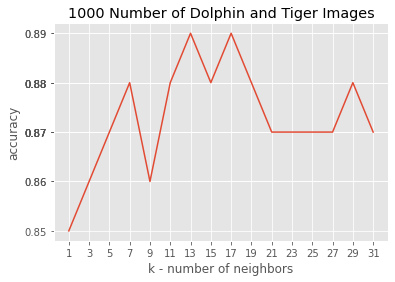

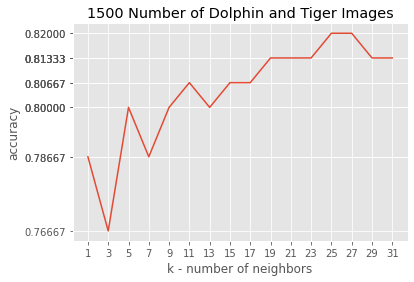

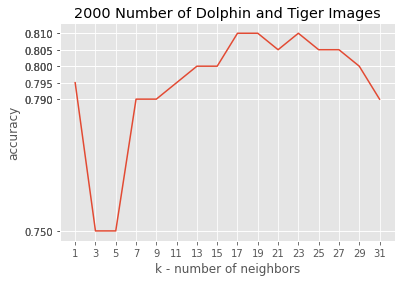

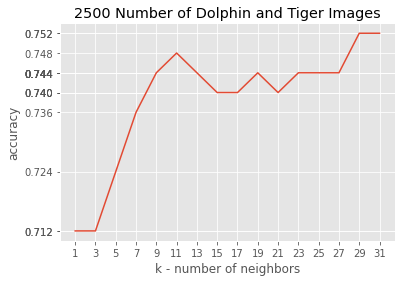

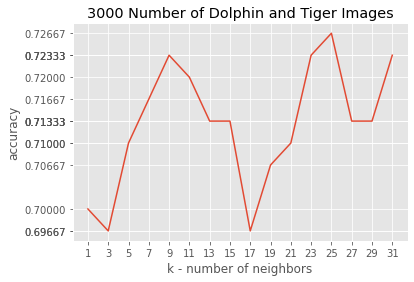

In [7]:
for n in datas:
    n_tigers = data_tigers[:n]
    n_dolphins = data_dolphins[:n]
    train_tigers, test_tigers = data_split(0.1, n_tigers)
    train_dolphins, test_dolphins = data_split(0.1, n_dolphins)
    train_data = train_tigers + train_dolphins
    test_data = test_tigers + test_dolphins
    train_labels = create_label(train_data, "tiger", "dolphin")
    test_labels = create_label(test_data, "tiger", "dolphin")
    
    k = 1
    ks = []
    acc = []
    while(k <= 31):
        final_output = []
        for i in range(len(test_data)):
            d = []
            votes = []
            for j in range(len(train_data)):
                dist = scipy.spatial.distance.euclidean(train_data[j] , test_data[i])
                d.append([dist, j])
            d.sort()
            d = d[0:k]
            for d, j in d:
                votes.append(train_labels[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        pred = np.array(final_output)
        test = np.array(test_labels)
        acc.append((pred == test).sum() / len(test))
        ks.append(k)
        k = k + 2

    plt.plot(ks, acc)
    plt.xticks(ks)
    plt.yticks(acc)
    plt.xlabel("k - number of neighbors")
    plt.ylabel("accuracy")
    plt.title(str(n*2) + " Number of Dolphin and Tiger Images")
    plt.show()